In [18]:
import sys
sys.path.append('..')

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.datasets import load_iris, load_diabetes
from sklearn.tree import DecisionTreeClassifier

# Load datasets
iris = load_iris()
X_classification, y_classification = iris.data, iris.target

# Split data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Load regression dataset
diabetes = load_diabetes()
X_regression, y_regression = diabetes.data, diabetes.target

# Split data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestClassifier as skRandomForestClassifier
from ensemble.RandomForestClassifier import RandomForestClassifier

# Create a Random Forest Classifier object
rf_classifier = skRandomForestClassifier(n_estimators=100, max_depth=3, max_features=3, min_samples_split=2, bootstrap=True)

# Train the classifier
rf_classifier.fit(X_train_class, y_train_class)

# Predict the labels
y_pred_class = rf_classifier.predict(X_test_class)

# Calculate the accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

# train my classifier
my_rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=3, min_samples_split=2, bootstrap=True)
my_rf_classifier.fit(X_train_class, y_train_class)
my_y_pred_class = my_rf_classifier.predict(X_test_class)
my_accuracy = accuracy_score(y_test_class, my_y_pred_class)

print(f"Accuracy of sklearn's Random Forest Classifier: {accuracy}")
print(f"Accuracy of my Random Forest Classifier: {my_accuracy}")

Accuracy of sklearn's Random Forest Classifier: 1.0
Accuracy of my Random Forest Classifier: 1.0


In [21]:

from sklearn.ensemble import RandomForestRegressor as skRandomForestRegressor
from ensemble.RandomForestRegressor import RandomForestRegressor

# Create a Random Forest Regressor object
rf_regressor = skRandomForestRegressor(n_estimators=100, max_depth=3, max_features=3, min_samples_split=2, bootstrap=True)

# Train the regressor
rf_regressor.fit(X_train_reg, y_train_reg)

# Predict the target
y_pred_reg = rf_regressor.predict(X_test_reg)

# Calculate the accuracy
mse = mean_squared_error(y_test_reg, y_pred_reg)

# train my regressor
my_rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=3, max_features=3, min_samples_split=2, bootstrap=True)
my_rf_regressor.fit(X_train_reg, y_train_reg)
my_y_pred_reg = my_rf_regressor.predict(X_test_reg)
my_mse = mean_squared_error(y_test_reg, my_y_pred_reg)

print(f"Mean Squared Error of sklearn's Random Forest Regressor: {mse}")
print(f"Mean Squared Error of my Random Forest Regressor: {my_mse}")

Mean Squared Error of sklearn's Random Forest Regressor: 2816.1446547934534
Mean Squared Error of my Random Forest Regressor: 3109.009328321945


In [22]:
# Training and evaluating custom AdaBoost
from ensemble.AdaBoost import AdaBoost
custom_ada = AdaBoost(weak_classifier=DecisionTreeClassifier, n_classifiers=50)
custom_ada.fit(X_train_class, y_train_class)
y_pred_custom_ada = custom_ada.predict(X_test_class)
accuracy_custom_ada = accuracy_score(y_test_class, y_pred_custom_ada)

# Training and evaluating sklearn AdaBoost
sklearn_ada = AdaBoostClassifier(n_estimators=50)
sklearn_ada.fit(X_train_class, y_train_class)
y_pred_sklearn_ada = sklearn_ada.predict(X_test_class)
accuracy_sklearn_ada = accuracy_score(y_test_class, y_pred_sklearn_ada)

# Print AdaBoost results
print("Custom AdaBoost Accuracy:", accuracy_custom_ada)
print("Sklearn AdaBoost Accuracy:", accuracy_sklearn_ada)


Custom AdaBoost Accuracy: 0.6333333333333333
Sklearn AdaBoost Accuracy: 1.0


Text(0.5, 1.0, 'AdaBoost Accuracy Comparison')

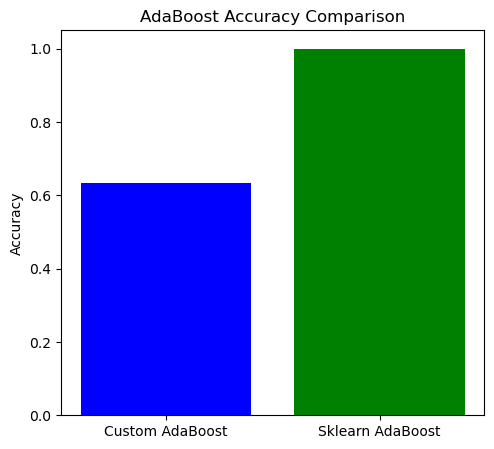

In [23]:

# Plot comparison for AdaBoost
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(['Custom AdaBoost', 'Sklearn AdaBoost'], [accuracy_custom_ada, accuracy_sklearn_ada], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy Comparison')


In [24]:

# Training and evaluating custom Gradient Boosting
from ensemble.GradientBoosting import GradientBoosting
custom_gb = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
custom_gb.fit(X_train_reg, y_train_reg)
y_pred_custom_gb = custom_gb.predict(X_test_reg)
mse_custom_gb = mean_squared_error(y_test_reg, y_pred_custom_gb)

# Training and evaluating sklearn Gradient Boosting
sklearn_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
sklearn_gb.fit(X_train_reg, y_train_reg)
y_pred_sklearn_gb = sklearn_gb.predict(X_test_reg)
mse_sklearn_gb = mean_squared_error(y_test_reg, y_pred_sklearn_gb)

# Print Gradient Boosting results
print("Custom Gradient Boosting MSE:", mse_custom_gb)
print("Sklearn Gradient Boosting MSE:", mse_sklearn_gb)


Custom Gradient Boosting MSE: 2902.745948717609
Sklearn Gradient Boosting MSE: 2886.99425058739


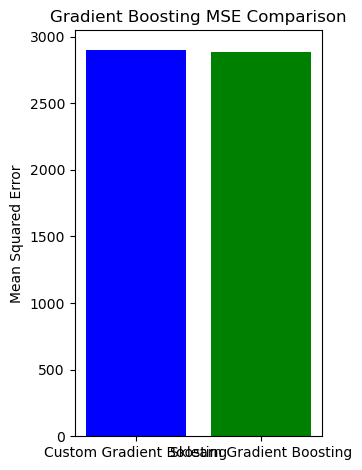

In [25]:

# Plot comparison for Gradient Boosting
plt.subplot(1, 2, 2)
plt.bar(['Custom Gradient Boosting', 'Sklearn Gradient Boosting'], [mse_custom_gb, mse_sklearn_gb], color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting MSE Comparison')

plt.tight_layout()
plt.show()

In [28]:
from ensemble.BaggingClassifier import BaggingClassifier
from sklearn.ensemble import BaggingClassifier as skBaggingClassifier

# training and evaluating custom bagging
custom_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
custom_bagging.fit(X_train_class, y_train_class)
y_pred_custom_bagging = custom_bagging.predict(X_test_class)
accuracy_custom_bagging = accuracy_score(y_test_class, y_pred_custom_bagging)

# training and evaluating sklearn bagging
sklearn_bagging = skBaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
sklearn_bagging.fit(X_train_class, y_train_class)
y_pred_sklearn_bagging = sklearn_bagging.predict(X_test_class)
accuracy_sklearn_bagging = accuracy_score(y_test_class, y_pred_sklearn_bagging)

# print bagging results
print("Custom Bagging Accuracy:", accuracy_custom_bagging)
print("Sklearn Bagging Accuracy:", accuracy_sklearn_bagging)



d:\Adnane\miniconda3\envs\ds_ci1\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Custom Bagging Accuracy: 1.0
Sklearn Bagging Accuracy: 1.0


In [30]:
from os import error
from ensemble.BaggingRegressor import BaggingRegressor
from sklearn.ensemble import BaggingRegressor as skBaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# training and evaluating custom bagging
custom_bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
custom_bagging.fit(X_train_reg, y_train_reg)
y_pred_custom_bagging = custom_bagging.predict(X_test_reg)
error_custom_bagging = mean_squared_error(y_test_reg, y_pred_custom_bagging)

# training and evaluating sklearn bagging
sklearn_bagging = skBaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
sklearn_bagging.fit(X_train_reg, y_train_reg)
y_pred_sklearn_bagging = sklearn_bagging.predict(X_test_reg)
error_sklearn_bagging = mean_squared_error(y_test_reg, y_pred_sklearn_bagging)

# print bagging results
print("Custom Bagging MSE:", error_custom_bagging)
print("Sklearn Bagging MSE:", error_sklearn_bagging)

d:\Adnane\miniconda3\envs\ds_ci1\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Custom Bagging MSE: 3177.59723258427
Sklearn Bagging MSE: 2981.2723426966295
